# Final Project - Word Cloud

For this project, you'll create a "word cloud" from a text by writing a script.  This script needs to process the text, remove punctuation, ignore case and words that do not contain all alphabets, count the frequencies, and ignore uninteresting or irrelevant words.  A dictionary is the output of the `calculate_frequencies` function.  The `wordcloud` module will then generate the image from your dictionary.

For the input text of your script, you will need to provide a file that contains text only.  For the text itself, you can copy and paste the contents of a website you like.  Or you can use a site like [Project Gutenberg](https://www.gutenberg.org/) to find books that are available online.  You could see what word clouds you can get from famous books, like a Shakespeare play or a novel by Jane Austen. Save this as a .txt file somewhere on your computer.
<br><br>
Now you will need to upload your input file here so that your script will be able to process it.  To do the upload, you will need an uploader widget.  Run the following cell to perform all the installs and imports for your word cloud script and uploader widget.  It may take a minute for all of this to run and there will be a lot of output messages. But, be patient. Once you get the following final line of output, the code is done executing. Then you can continue on with the rest of the instructions for this notebook.
<br><br>
**Enabling notebook extension fileupload/extension...**
<br>
**- Validating: <font color =green>OK</font>**

In [11]:
# Here are all the installs and imports you will need for your word cloud script and uploader widget

!pip install wordcloud
!pip install fileupload
!pip install ipywidgets
!jupyter nbextension install --py --user fileupload
!jupyter nbextension enable --py fileupload

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys

    100% |████████████████████████████████| 368kB 26.0MB/s ta 0:00:01


Installing /opt/conda/lib/python3.6/site-packages/fileupload/static -> fileupload
Making directory: /home/jovyan/.local/share/jupyter/nbextensions/fileupload/
Copying: /opt/conda/lib/python3.6/site-packages/fileupload/static/extension.js -> /home/jovyan/.local/share/jupyter/nbextensions/fileupload/extension.js
Copying: /opt/conda/lib/python3.6/site-packages/fileupload/static/widget.js -> /home/jovyan/.local/share/jupyter/nbextensions/fileupload/widget.js
Making directory: /home/jovyan/.local/share/jupyter/nbextensions/fileupload/fileupload
Copying: /opt/conda/lib/python3.6/site-packages/fileupload/static/fileupload/widget.js -> /home/jovyan/.local/share/jupyter/nbextensions/fileupload/fileupload/widget.js
- Validating: OK

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable fileupload --user --py
    
Enabling notebook extension fileupload/extension...
      - Validating: OK


Whew! That was a lot. All of the installs and imports for your word cloud script and uploader widget have been completed. 
<br><br>
**IMPORTANT!** If this was your first time running the above cell containing the installs and imports, you will need save this notebook now. Then under the File menu above,  select Close and Halt. When the notebook has completely shut down, reopen it. This is the only way the necessary changes will take affect.
<br><br>
To upload your text file, run the following cell that contains all the code for a custom uploader widget. Once you run this cell, a "Browse" button should appear below it. Click this button and navigate the window to locate your saved text file.

In [11]:
# This is the uploader widget

def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()

    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)

_upload()

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

The uploader widget saved the contents of your uploaded file into a string object named *file_contents* that your word cloud script can process. This was a lot of preliminary work, but you are now ready to begin your script. 

Write a function in the cell below that iterates through the words in *file_contents*, removes punctuation, and counts the frequency of each word.  Oh, and be sure to make it ignore word case, words that do not contain all alphabets and boring words like "and" or "the".  Then use it in the `generate_from_frequencies` function to generate your very own word cloud!
<br><br>
**Hint:** Try storing the results of your iteration in a dictionary before passing them into wordcloud via the `generate_from_frequencies` function.

In [77]:
file_contents = "As the Chinese proverb says, a journey of a thousand miles begins with a single step. Today's a big day, you're taking your first step in your journey to learn how to write scripts in Python. It's going to be a little challenging at times, but really it's not that scary. We'll go slow and give you everything you need to fully grasp each concept before we move along. In the next few videos, you'll discover the fundamental concepts of computer programming. You'll learn what a programming language is, what scripting is, what languages are out there other than Python, and how this all relates to IT. We'll also have you coding before you know it with small coding exercises we've cooked up to give you hands-on practice with Python. This will include writing your very first Python script. But always keep in mind, if at any point along the way you feel lost or confused, don't panic. You can watch the videos as many times as you need to let the concept sink in, plus you can ask questions in the discussion forums, which is one of the best ways to find extra information and connect with other learners. When I was asked to participate in this program, it made me think about when I first started to code. If I could give that younger version of myself a piece of advice, this is what I would tell her, it never works the first time. Seriously, as a newbie, I expected it all to work like magic. I thought that following the rules and getting it right the first time would prove my value as a coder, but that's just not true, not even the best of the best. If you expect to write perfect code on the first shot you're going to be disappointed. You hear that younger self? Try not to feel overwhelmed by the details. Connecting the dots only comes with experience, so the best way to learn is to just jump in. The truth is everyone learns at their own pace. If you already know some of these concepts, feel free to skip ahead to the parts that interests you the most. If you're starting from scratch, take as long as you need for each concept. The assessments will be right there waiting for you when you're done, and if at any point you start doubting yourself, remember, even the most advanced programmers started thinking, Python? What's Python? Well, we're about to learn all about it, so let's dive in. Next up, we'll be doing a rundown of what programming is."

In [88]:
def calculate_frequencies(file_contents):
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "in", "some", "such", "no", "nor", "too", "very", "can", "will", "just"]
    
    # LEARNER CODE START HERE #my code
    
    import re
    
    out = re.sub(r'[^a-zA-Z0-9\s]', '', file_contents)
    
    
    wordstring = out
   
    wordstring2 = wordstring.lower()

    wordlist = wordstring2.split()

    wordlist2 = list(set(wordlist) - set(uninteresting_words))
    
    
    wordfreq = []
    for w in wordlist2:
        wordfreq.append(wordlist.count(w))

    print("String\n" + wordstring2 +"\n")
    print("List\n" + str(wordlist2) + "\n")
    print("Frequencies\n" + str(wordfreq) + "\n")
    print("Pairs\n" + str(list(zip(wordlist2, wordfreq))))
    
    freq = dict(list(zip(wordlist2, wordfreq)))
    
    print(freq)
    
 

    
    
    
    #wordcloud
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(freq)
    return cloud.to_array()

If you have done everything correctly, your word cloud image should appear after running the cell below.  Fingers crossed!

String
as the chinese proverb says a journey of a thousand miles begins with a single step todays a big day youre taking your first step in your journey to learn how to write scripts in python its going to be a little challenging at times but really its not that scary well go slow and give you everything you need to fully grasp each concept before we move along in the next few videos youll discover the fundamental concepts of computer programming youll learn what a programming language is what scripting is what languages are out there other than python and how this all relates to it well also have you coding before you know it with small coding exercises weve cooked up to give you handson practice with python this will include writing your very first python script but always keep in mind if at any point along the way you feel lost or confused dont panic you can watch the videos as many times as you need to let the concept sink in plus you can ask questions in the discussion forums whic

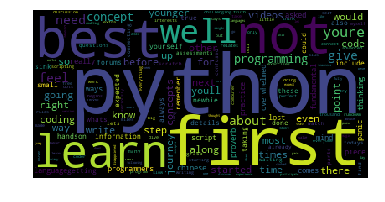

In [89]:
# Display your wordcloud image

myimage = calculate_frequencies(file_contents)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()

If your word cloud image did not appear, go back and rework your `calculate_frequencies` function until you get the desired output.  Definitely check that you passed your frequecy count dictionary into the `generate_from_frequencies` function of `wordcloud`. Once you have correctly displayed your word cloud image, you are all done with this project. Nice work!